## Dara's EDA

Prob of A or B  = prob of B * prob A given that B happened
Prob of B       =            prob of B

# Business Problem / Project Goal 
Predict which pumps are functional, which need some repairs, and which don't work at all.

Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

In [42]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve

In [43]:
# import CSV
df_test = pd.read_csv('data/test_set_values.csv')
df_test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [44]:
# import CSV
df_train = pd.read_csv('data/training_set_values.csv')
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [45]:
# import CSV 
df_train_label = pd.read_csv('data/training_set_labels.csv')

# call .head to peek at target group- status_group
df_train_label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [46]:
# value_counts of the three targets
df_train_label['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [47]:
# placing label names into a target variable
target = df_train_label.replace({'status_group': {'functional':1,
                                'non functional': 0,
                                'functional needs repair': 2}})
target['status_group'].value_counts()

1    32259
0    22824
2     4317
Name: status_group, dtype: int64

In [48]:
# replacing status group column with target trinomial variable?
df = pd.concat([df_train, target], axis=1)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,1
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,1
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,1
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,1


In [72]:
# deleting columns
col_to_delete = ['id', 'recorded_by', 'funder', 'public_meeting',
                'lga', 'ward', 'region_code', 'district_code', 
                 'wpt_name','scheme_name', 'extraction_type', 'extraction_type_group',
                 'payment', 'quality_group', 'source_type', 'quantity_group',
                 'waterpoint_type_group', 'subvillage', 'num_private', 'date_recorded']
                 
df2 = df.drop(col_to_delete, axis=1)
df2.head()

,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,scheme_management,permit,...,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109,VWC,False,...,gravity,vwc,user-group,annually,soft,enough,spring,groundwater,communal standpipe,1
1,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,280,Other,True,...,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,1
2,25.0,686,World vision,37.460664,-3.821329,Pangani,Manyara,250,VWC,True,...,gravity,vwc,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,1
3,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,VWC,True,...,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,0
4,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0,NaN,True,...,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,1


In [82]:
df2['amount_tsh'].value_counts(ascending=False)

<bound method IndexOpsMixin.value_counts of 0              enough\n1        insufficient\n2              enough\n3                 dry\n4            seasonal\n             ...     \n59395          enough\n59396          enough\n59397          enough\n59398    insufficient\n59399          enough\nName: quantity, Length: 59400, dtype: object>    59400
Name: amount_tsh, dtype: int64

In [79]:
df2['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [83]:
df

AttributeError: 'amount_tsh' is not a valid function for 'Series' object

In [50]:
# find rows/columns
print(df2.shape)

(59400, 21)


In [51]:
# identified dupes and dropped 
print(df2.duplicated().value_counts())

df2.drop_duplicates(keep='first',inplace=True)

False    58481
True       919
dtype: int64


<ipython-input-51-e252a5f7d44e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(keep='first',inplace=True)


In [52]:
df2.shape

(58481, 21)

In [53]:
# identified nulls & dropped
df2 = df2.dropna(axis = 0)
df2.shape

(52593, 21)

In [54]:
# taking year from date_recorded column and dropping month/day
df2['year_recorded'] = [val[0:4] for val in df2['date_recorded']]
df2['year_recorded'].astype(np.int64)
df2.drop(['date_recorded'], axis='columns', inplace=True)
df2.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region_code,district_code,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source_class,waterpoint_type,status_group,year_recorded
0,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,11,5,109,True,...,1999,gravity,user-group,pay annually,soft,enough,groundwater,communal standpipe,1,2011
2,25.0,686,37.460664,-3.821329,0,Pangani,21,4,250,True,...,2009,gravity,user-group,pay per bucket,soft,enough,surface,communal standpipe multiple,1,2013
3,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,90,63,58,True,...,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe multiple,0,2013
4,0.0,0,31.130847,-1.825359,0,Lake Victoria,18,1,0,True,...,0,gravity,other,never pay,soft,seasonal,surface,communal standpipe,1,2011
5,20.0,0,39.172796,-4.765587,0,Pangani,4,8,1,True,...,2009,submersible,user-group,pay per bucket,salty,enough,unknown,communal standpipe multiple,1,2011


In [55]:
# functions for scaling & one hot encodings
def num_encoder(df_to_encode):
    ss = StandardScaler()

    ss.fit(df_to_encode)
    nums_df = pd.DataFrame(ss.transform(df_to_encode),
                          index=df_to_encode.index)
    return nums_df

def cat_encoder(df_to_encode):
    ohe = OneHotEncoder(
        drop='first',
        sparse=False)
    
    dums = ohe.fit_transform(df_to_encode)
    dums_df = pd.DataFrame(dums,
                            columns=ohe.get_feature_names(),
                            index=df_to_encode.index)
    return dums_df

In [56]:
# test train split (dropping status_group since its the target)
y = df2.status_group
X = df2.drop('status_group', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

In [57]:
# # make Xtrain cat & num 
# X_train_cat = X_test.select_dtypes('object')
# X_train_nums = X_train.select_dtypes('float64', 'int64')

# # make Xtest cat & num 
# X_test_cat = X_test.select_dtypes('object')
# X_test_nums = X_test.select_dtypes('float64', 'int64')

# # finding shape on Xtrain/Xtest cat & num
# X_train_cat.shape, X_train_nums.shape, X_test_cat.shape, X_test_nums.shape

X_train_cat = X_train.select_dtypes('object')
X_train_nums = X_train.select_dtypes('float64', 'int64')

X_test_cat = X_test.select_dtypes('object')
X_test_nums = X_test.select_dtypes('float64', 'int64')

X_train_cat.shape, X_train_nums.shape, X_test_cat.shape, X_test_nums.shape

((39444, 11), (39444, 3), (13149, 11), (13149, 3))

In [58]:
# Xtrain clean 
X_train_clean = pd.concat([num_encoder(X_train_nums), cat_encoder(X_train_cat)], axis=1)
X_train_clean.head()

,0,1,2,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,...,x9_communal standpipe,x9_communal standpipe multiple,x9_dam,x9_hand pump,x9_improved spring,x9_other,x10_2004,x10_2011,x10_2012,x10_2013
1850,-0.121530,-0.054049,0.723799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3015,0.052972,0.169300,-0.542489,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6309,0.035522,0.510411,0.926777,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32382,-0.121530,-6.897378,2.046509,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45759,-0.121530,-6.897378,2.046509,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
# # Xtest clean

X_test_clean = pd.concat([num_encoder(X_test_nums), cat_encoder(X_test_cat)], axis=1)


X_test_clean['x10_2004'] = 0


X_test_clean.head()

,0,1,2,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,...,x9_communal standpipe,x9_communal standpipe multiple,x9_dam,x9_hand pump,x9_improved spring,x9_other,x10_2011,x10_2012,x10_2013,x10_2004
37710,-0.141508,-0.904537,0.481689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
39398,-0.141508,-0.863779,0.715170,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
57015,-0.141508,-0.327726,0.727956,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
47030,-0.141508,-0.101579,0.981353,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
43873,0.081802,0.534724,0.822826,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [65]:
# logistic regression
logreg_clf = LogisticRegression(random_state=69, multi_class='multinomial', solver='newton-cg')
logreg_model = logreg_clf.fit(X_train_clean, y_train)

In [66]:
logreg_train_pred = logreg_clf.predict(X_train_clean)
logreg_train_acc = accuracy_score(y_train, logreg_train_pred)

log_val_preds = logreg_clf.predict(X_test_clean) # y_hat
log_val_accuracy = accuracy_score(y_test, log_val_preds)

logreg_train_acc, log_val_accuracy

(0.7204137511408579, 0.6732070879914822)

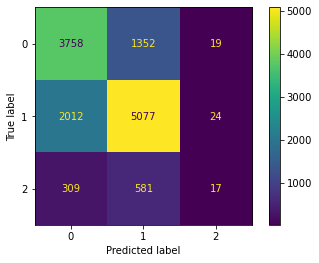

In [67]:
plot_confusion_matrix(logreg_clf, X_test_clean, y_test);